# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
%matplotlib inline


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code: #reading each file and creating df
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code: #first 10 rows of sat_2017
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#first 10 rows of act_2017
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: sat_2017 displays the average partipation rate, evidence-based reading and writing score, math score and total score across 51 states. 

#### 4a. Does the data look complete? 

In [5]:
#checking df for null values
sat_2017.notnull().sum()

State                                 51
Participation                         51
Evidence-Based Reading and Writing    51
Math                                  51
Total                                 51
dtype: int64

In [6]:
#checking against number of rows
sat_2017.shape

(51, 5)

In [7]:
#checking df for null values
act_2017.notnull().sum()

State            52
Participation    52
English          52
Math             52
Reading          52
Science          52
Composite        52
dtype: int64

In [8]:
#checking against number of rows
act_2017.shape

(52, 7)

Answer:  Yes. The act2017 dataset has 1 more entry because it includes data for 'National'.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)

In [9]:
sat_2017[sat_2017['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [10]:
act_2017[act_2017['State'] == 'Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [11]:
act_2017[act_2017['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Answer: 
The scores for each section(ERW, Math) in the SAT ranges from 200-800 while the scores for each section (English, Math, Reading, Science) in the ACT ranges from 1-36. The avereage SAT score for Math in Maryland is too low. The average ACT composite score in Wyoming seems to be entered wrongly with 'x'. The score for Science is also too low for ACT 2017 in the state of Maryland.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [12]:
#code #directing changing cell values in df according to available data
sat_2017.loc[sat_2017['State'] == 'Maryland', 'Math'] = 524
act_2017.loc[act_2017['State'] == 'Wyoming', 'Composite'] = 20.2
act_2017.loc[act_2017['State'] == 'Maryland', 'Science'] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
#code #displaying dtypes of sat_2017
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [14]:
#displaying dtypes of act_2017
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 'Participation' from both datasets are 'object' types and should be type 'float'. 'Composite' from act_2017 should be type 'float'.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
#code #takes in an object removes the % and spaces, if any.
def convert_percent(x):
    return float(x.split('%')[0].strip())

- Fix any individual values preventing other columns from being the appropriate type.

In [16]:
#code converting participation % to float for both df
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x : convert_percent(x)) 
act_2017['Participation'] = act_2017['Participation'].map(lambda x : convert_percent(x)) 

- Finish your data modifications by making sure the columns are now typed appropriately.

In [17]:
#code #converting all str to float after removing x
act_2017['Composite'] = act_2017['Composite'].map(lambda x: float(x))

- Display the data types again to confirm they are correct.

In [18]:
#Code: #checking dtypes after modifications
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [19]:
#checking dtypes after modifications
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [20]:
#creating column dicts for both df
sat_2017_new_columns_dict = {
        'State':'state',
        'Participation':'part_sat_17',
        'Evidence-Based Reading and Writing':'erw_sat_17',
        'Math':'math_sat_17',
        'Total':'total_sat_17'
}

act_2017_new_columns_dict = {
        'State':'state',
        'Participation':'part_act_17',
        'English':'eng_act_17',
        'Math':'math_act_17',
        'Reading':'read_act_17',
        'Science':'sci_act_17',
        'Composite':'comp_act_17'
}

In [21]:
#code #renaming columns using created column dicts
sat_2017.rename(columns = sat_2017_new_columns_dict, inplace = True)
act_2017.rename(columns = act_2017_new_columns_dict, inplace = True)

In [22]:
#checking columns after modification
sat_2017.columns

Index(['state', 'part_sat_17', 'erw_sat_17', 'math_sat_17', 'total_sat_17'], dtype='object')

In [23]:
#checking columns after modification
act_2017.columns

Index(['state', 'part_act_17', 'eng_act_17', 'math_act_17', 'read_act_17',
       'sci_act_17', 'comp_act_17'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|States belonging to the USA| 
|part_sat_17|float|SAT|SAT Participation Rate for states in 2017| 
|erw_sat_17|int|SAT|Average Evidence-based Reading and Writing score for SAT 2017| 
|math_sat_17|int|SAT|Average Math score for SAT 2017| 
|total_sat_17|int|SAT|Average Total score for SAT 2017| 
|part_act_17|float|ACT|ACT Participation Rate for states in 2017| 
|eng_act_17|float|ACT|Average English score for ACT 2017| 
|math_act_17|float|ACT|Average Math score for ACT 2017| 
|read_act_17|float|ACT|Average Reading score for ACT 2017| 
|sci_act_17|float|ACT|Average Science score for ACT 2017| 
|comp_act_17|float|ACT|Average Composite score for ACT 2017| 
|part_sat_18|float|SAT|SAT Participation Rate for states in 2018| 
|erw_sat_18|int|SAT|Average Evidence-based Reading and Writing score for SAT 2018| 
|math_sat_18|int|SAT|Average Math score for SAT 2018|  
|total_sat_18|int|SAT|Average Total score for SAT 2018|
|part_act_18|int|ACT|ACT Participation Rate for states in 2018| 
|eng_act_18|float|ACT|Average English score for ACT 2018| 
|math_act_18|float|ACT|Average Math score for ACT 2018|
|read_act_18|float|ACT|Average Reading score for ACT 2018| 
|sci_act_18|float|ACT|Average Science score for ACT 2018| 
|comp_act_18|float|ACT|Average Composite score for ACT 2018|
 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
#code #dropping 'National' for act_2017
act_2017.drop([0], inplace= True)

In [25]:
#checking for 'National'
act_2017[act_2017['state'] == 'National']

,state,part_act_17,eng_act_17,math_act_17,read_act_17,sci_act_17,comp_act_17


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
#Code: #joining the 2 df via state
combined_2017 = pd.merge(sat_2017, act_2017, on = 'state', how = 'right')

In [27]:
#verifying the merge
combined_2017.head()

,state,part_sat_17,erw_sat_17,math_sat_17,total_sat_17,part_act_17,eng_act_17,math_act_17,read_act_17,sci_act_17,comp_act_17
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


In [28]:
#verifying the merge
combined_2017.shape

(51, 11)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
#code #saving the merged df
combined_2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
#reading the files
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

In [31]:
#checking the completeness of the data
print(sat_2018.shape)
print(sat_2018.dtypes)
print(sat_2018.notnull().sum())

(51, 5)
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State                                 51
Participation                         51
Evidence-Based Reading and Writing    51
Math                                  51
Total                                 51
dtype: int64


In [32]:
#correcting the 'Participation' dtype
sat_2018['Participation'] = sat_2018['Participation'].map(lambda x : convert_percent(x)) 

In [33]:
#verifying the change
print(sat_2018.dtypes)
sat_2018.head()

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [34]:
#checking the completeness of the data
print(act_2018.shape)
print(act_2018.dtypes)
print(act_2018.notnull().sum())

(51, 7)
State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object
State                            51
Percentage of Students Tested    51
Average Composite Score          51
Average English Score            51
Average Math Score               51
Average Reading Score            51
Average Science Score            51
dtype: int64


In [35]:
#creating column dicts for both df
sat_2018_new_columns_dict = {
        'State':'state',
        'Participation':'part_sat_18',
        'Evidence-Based Reading and Writing':'erw_sat_18',
        'Math':'math_sat_18',
        'Total':'total_sat_18'
}

act_2018_new_columns_dict = {
        'State':'state',
        'Percentage of Students Tested':'part_act_18',
        'Average English Score':'eng_act_18',
        'Average Math Score':'math_act_18',
        'Average Reading Score':'read_act_18',
        'Average Science Score':'sci_act_18',
        'Average Composite Score':'comp_act_18'
}

In [36]:
#code #renaming columns using created column dicts
sat_2018.rename(columns = sat_2018_new_columns_dict, inplace = True)
act_2018.rename(columns = act_2018_new_columns_dict, inplace = True)

In [37]:
#checking columns after modification
sat_2018.columns

Index(['state', 'part_sat_18', 'erw_sat_18', 'math_sat_18', 'total_sat_18'], dtype='object')

In [38]:
#checking columns after modification
act_2018.columns

Index(['state', 'part_act_18', 'comp_act_18', 'eng_act_18', 'math_act_18',
       'read_act_18', 'sci_act_18'],
      dtype='object')

In [39]:
#rearranging the columns
act_2018 = act_2018[['state', 'part_act_18', 'eng_act_18', 'math_act_18',
       'read_act_18', 'sci_act_18','comp_act_18']]

In [40]:
#Code: #joining the 2018 dfs via state
combined_2018 = pd.merge(sat_2018, act_2018, on = 'state', how = 'right')

In [41]:
#verifying the merge
print(combined_2018.shape)
combined_2018.head()

(51, 11)


,state,part_sat_18,erw_sat_18,math_sat_18,total_sat_18,part_act_18,eng_act_18,math_act_18,read_act_18,sci_act_18,comp_act_18
0,Alabama,6.0,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,43.0,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,29.0,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,5.0,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,60.0,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [42]:
#code #saving the merged df
combined_2018.to_csv('combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [43]:
#Code: #joining the 2017 and 2018 data
final = pd.merge(combined_2017, combined_2018, on = 'state', how = 'right')

In [44]:
#verifying the merge
print(final.shape)
final.head()

(51, 21)


,state,part_sat_17,erw_sat_17,math_sat_17,total_sat_17,part_act_17,eng_act_17,math_act_17,read_act_17,sci_act_17,...,part_sat_18,erw_sat_18,math_sat_18,total_sat_18,part_act_18,eng_act_18,math_act_18,read_act_18,sci_act_18,comp_act_18
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [45]:
#code #saving the merged df
final.to_csv('final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [46]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
part_sat_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
erw_sat_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
part_act_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
eng_act_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
read_act_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
sci_act_17,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
comp_act_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [47]:
#code #takes in a dataset and calculates the standard deviation
def stand_dev(data):
    n = len(data)    
    m = data.sum()/n    
    sum_of_sqs = 0
    for x in data:
        sum_of_sqs += ((x - m) ** 2)
    return (sum_of_sqs/n) ** 0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [48]:
#Code: # dict comprehension for all columns in final excluding 'state' 
sd = {k: stand_dev(final[k]) for k in list(final.columns)[1:]}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [49]:
final.describe()[['part_sat_17']].T

,count,mean,std,min,25%,50%,75%,max
part_sat_17,51.0,39.803922,35.276632,2.0,4.0,38.0,66.0,100.0


In [50]:
sd['part_sat_17']

34.92907076664508

In [51]:
np.std(final['part_sat_17'])

34.92907076664508

Answer: No. It does match up to numpy's std method though. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [52]:
#participation for sat2017; displays all the states with the highest participation
final[final['part_sat_17'] == final['part_sat_17'].max()][['state', 'part_sat_17']]

,state,part_sat_17
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,100.0
22,Michigan,100.0


There are 4 states with 100% participation for SAT2017.

In [53]:
#participation for sat2017; displays all the states with the lowest participation
final[final['part_sat_17'] == final['part_sat_17'].min()][['state', 'part_sat_17']]

,state,part_sat_17
15,Iowa,2.0
24,Mississippi,2.0
34,North Dakota,2.0


There are 3 state with 2% participation for SAT2017.

In [54]:
#participation for sat2018; displays all the states with the highest participation
final[final['part_sat_18'] == final['part_sat_18'].max()][['state', 'part_sat_18']]

,state,part_sat_18
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
12,Idaho,100.0
22,Michigan,100.0


There are 5 countries in 2018 with 100% participation for SAT2018. Other than Colorado, the other 4 countries had 100% participation in 2017 as well. This implies that SAT might be compulsory for high school students in those states. 

In [55]:
#participation for sat2018; displays all the states with the lowest participation
final[final['part_sat_18'] == final['part_sat_18'].min()][['state', 'part_sat_18']]

,state,part_sat_18
34,North Dakota,2.0


There is only 1 state in 2018 that has 2% participation for SAT2018. It is possible that another examination is taken in place of SAT to measure college readiness in that state.

In [56]:
#participation for act2017; displays all the states with the highest participation
final[final['part_act_17'] == final['part_act_17'].max()][['state', 'part_act_17']]

,state,part_act_17
0,Alabama,100.0
3,Arkansas,100.0
5,Colorado,100.0
17,Kentucky,100.0
18,Louisiana,100.0
23,Minnesota,100.0
24,Mississippi,100.0
25,Missouri,100.0
26,Montana,100.0
28,Nevada,100.0


There are 17 state with 100% participation for ACT in 2017. 

In [57]:
#participation for act2017; displays all the states with the lowest participation
final[final['part_act_17'] == final['part_act_17'].min()][['state', 'part_act_17']]

,state,part_act_17
19,Maine,8.0


There is only 1 state with 8% participation for ACT 2017.

In [58]:
#participation for act2018; displays all the states with the highest participation
final[final['part_act_18'] == final['part_act_18'].max()][['state', 'part_act_18']]

,state,part_act_18
0,Alabama,100
3,Arkansas,100
17,Kentucky,100
18,Louisiana,100
24,Mississippi,100
25,Missouri,100
26,Montana,100
27,Nebraska,100
28,Nevada,100
33,North Carolina,100


There are again 17 states with 100% participation for the ACT in 2018. However, not all the countries are the same. 

In [59]:
#participation for act2018; displays all the states with the lowest participation
final[final['part_act_18'] == final['part_act_18'].min()][['state', 'part_act_18']]

,state,part_act_18
19,Maine,7


Maine has the lowest participation in 2018 for ACT as well. It is possible that another examination is taken in place of ACT to measure college readiness in Maine.

In [60]:
#total score for sat2017; displays all the states with the highest score
final[['state', 'total_sat_17']].sort_values(['total_sat_17', 'state'], ascending=[False, False]).head()

,state,total_sat_17
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


Minnesota has the highest total score at 1295 for SAT 2017.

In [61]:
#total score for sat2017; displays all the states with the lowest score
final[['state', 'total_sat_17']].sort_values(['total_sat_17', 'state'], ascending=[True, False]).head()

,state,total_sat_17
8,District of Columbia,950
7,Delaware,996
22,Michigan,1005
12,Idaho,1005
19,Maine,1012


District of Columbia has the lowest total score at 950 for SAT 2017.

In [62]:
#total score for sat2018; displays all the states with the highest score
final[['state', 'total_sat_18']].sort_values(['total_sat_18', 'state'], ascending=[False, False]).head()

,state,total_sat_18
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
16,Kansas,1265
15,Iowa,1265


Again in 2018, Minnesota has the highest total score for SAT. 

In [63]:
#total score for sat2018; displays all the states with the lowest score
final[['state', 'total_sat_18']].sort_values(['total_sat_18', 'state'], ascending=[True, False]).head()

,state,total_sat_18
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


Again in 2018, Districtof Columbia has the lowest total score for SAT. 

In [64]:
#total score for act2017; displays all the states with the highest score 
final[['state', 'comp_act_17']].sort_values(['comp_act_17', 'state'], ascending=[False, False]).head()

,state,comp_act_17
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
32,New York,24.2


New Hampshire has the highest composite score for ACT 2017. 

In [65]:
#total score for act2017; displays all the states with the lowest score 
final[['state', 'comp_act_17']].sort_values(['comp_act_17', 'state'], ascending=[True, False]).head()

,state,comp_act_17
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


Neveda has the lowest composite score for ACT 2017. 

In [66]:
#total score for act2018; displays all the states with the highest score 
final[['state', 'comp_act_18']].sort_values(['comp_act_18', 'state'], ascending=[False, False]).head()

,state,comp_act_18
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


Connecticut	has the highest composite score at 25.6 in ACT 2018.

In [67]:
#total score for act2018; displays all the states with the lowest score 
final[['state', 'comp_act_18']].sort_values(['comp_act_18', 'state'], ascending=[True, False]).head()

,state,comp_act_18
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
33,North Carolina,19.1


Again, Neveda has the lowest composite score for ACT 2018. 

Do any states with 100% participation on a given test have a rate change year-to-year?

In [68]:
#state participation change for sat
part_sat_100 = final[(final['part_sat_17'] == 100) |(final['part_sat_18'] == 100)]
part_sat_100_filtered = part_sat_100[['state','part_sat_17', 'part_sat_18']]
part_sat_100_filtered[part_sat_100_filtered['part_sat_17'] - part_sat_100_filtered['part_sat_18'] != 0.0]

,state,part_sat_17,part_sat_18
5,Colorado,11.0,100.0
8,District of Columbia,100.0,92.0
12,Idaho,93.0,100.0


There is a huge increase for Colorado's participation in the SAT from 2017 to 2018. This huge change might be caused by a policy change to make the SAT compulsory to measure college readiness. There are small changes for the District of Columbia and Idaha, perhaps some schools opting out of SAT. 

In [69]:
#state participation change for act
part_act_100 = final[(final['part_act_17'] == 100) |(final['part_act_18'] == 100)]
part_act_100_filtered = part_act_100[['state','part_act_17', 'part_act_18']]
part_act_100_filtered[part_act_100_filtered['part_act_17'] - part_act_100_filtered['part_act_18'] != 0.0]

,state,part_act_17,part_act_18
5,Colorado,100.0,30
23,Minnesota,100.0,99
27,Nebraska,84.0,100
35,Ohio,75.0,100


There is a huge decrease for Colorado's participation in the ACT from 2017 to 2018. Together with the SAT data, it might be possible that the state has switched from ACT to SAT as the exam to take for college readiness. There is little drop for participation for Minnesota, could be a few schools opting out of the ACT. There is substantial increase for participation rates for Nebraska and Ohio, this could be caused by policies to make ACT compulsory in respective states. 

Do any states show have >50% participation on *both* tests either year?

In [70]:
#state participation for both test 2017
part_both_2017 = final[(final['part_sat_17'] > 50) & (final['part_act_17'] > 50)]
part_both_2017_filtered = part_both_2017[['state','part_sat_17', 'part_act_17']]
part_both_2017_filtered

,state,part_sat_17,part_act_17
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


In states with more than 50% participation for either exam in 2017, SAT sems to be the more popular exam in Florida and Georgia, while ACT is more popular in Hawaii. 

In [71]:
#state participation for both test 2018
part_both_2018 = final[(final['part_sat_18'] > 50) & (final['part_act_18'] > 50)]
part_both_2018_filtered = part_both_2018[['state','part_sat_18', 'part_act_18']]
part_both_2018_filtered

,state,part_sat_18,part_act_18
9,Florida,56.0,66
10,Georgia,70.0,53
11,Hawaii,56.0,89
33,North Carolina,52.0,100
40,South Carolina,55.0,100


In states with more than 50% participation for either exam in 2018, ACT has become more popular than SAT for Florida, while the preference is still the same for Georgia and Hawaii. There is also increase in participation for both exams in North and South Carolina. ACT might be compulsory to take for college readiness for North and South Carolina in 2018. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

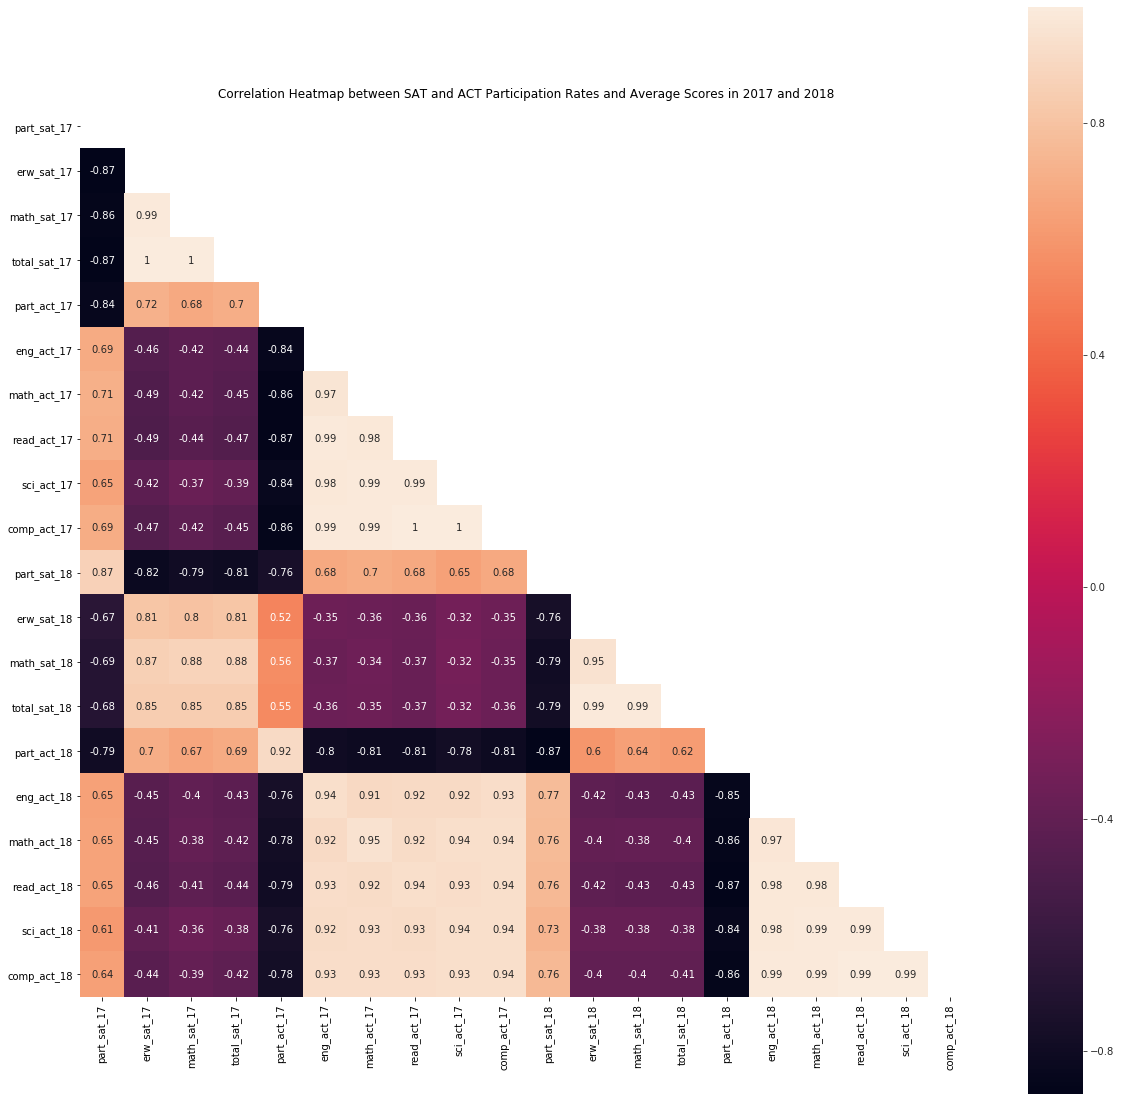

In [72]:
#establish figure size
plt.figure(figsize=(20,20))

#setting title
ax = plt.axes()
ax.set_title('Correlation Heatmap between SAT and ACT Participation Rates and Average Scores in 2017 and 2018')

#set up mask to be "True" in the upper triangle
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

#plotting heatmap while masking upper triangle with white
with sns.axes_style("white"):
    sns.heatmap(final.corr(), mask=mask, square = True, annot=True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [73]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [74]:
part_list = ['part_sat_17', 'part_sat_18', 'part_act_17', 'part_act_18']
part_title = ['Mean Participation SAT2017', 'Mean Participation SAT2018', 'Mean Participation ACT2017', 'Mean Participation ACT2018']
part_label = ['Mean Participation', 'Mean Participation', 'Mean Participation', 'Mean Participation']
math_list = ['math_sat_17', 'math_sat_18', 'math_act_17', 'math_act_18']
math_title = ['Mean Math Score SAT2017', 'Mean Math Score SAT2018', 'Mean Math Score ACT2017', 'Mean Math Score ACT2018']
math_label = ['Mean Math Score', 'Mean Math Score', 'Mean Math Score', 'Mean Math Score']
read_list = ['erw_sat_17', 'erw_sat_18', 'read_act_17', 'read_act_18']
read_title = ['Mean Reading Score SAT2017', 'Mean Reading Score SAT2018', 'Mean Reading Score ACT2017', 'Mean Reading Score ACT2018']
read_label = ['Mean Reading Score', 'Mean Reading Score', 'Mean Reading Score', 'Mean Reading Score']

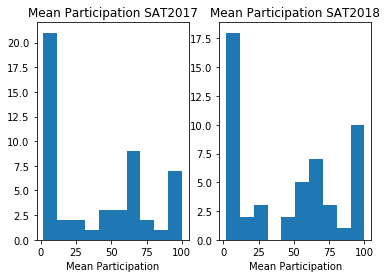

In [75]:
# Code #hist for sat participation
subplot_histograms(final, part_list[:2], part_title[:2] , part_label[:2])

There seems to be an increase in the number of states taking the SAT from 2017 to 2018.  This can be seen from the decrease in the number of mean participations in the lowest quartile and the increase in the number of mean partipations in the highest quartile. This popularity increase in the SAT and likelyhood of it being compulsory in some states. 

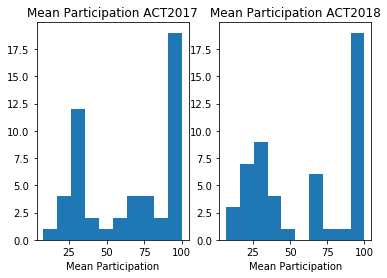

In [76]:
#hist for act participation
subplot_histograms(final, part_list[2:], part_title[2:] , part_label[2:])

There is an decrease in the number of mean participations in the lower quartiles and the increase in the number of mean partipations in the higher quartiles. This implies that there is an increase in the number of states taking the ACT from 2017 to 2018. With referece to the participations in SAT, ACT seems to be the more popular exam to measure college readiness and more states are switching from SAT to ACT.  

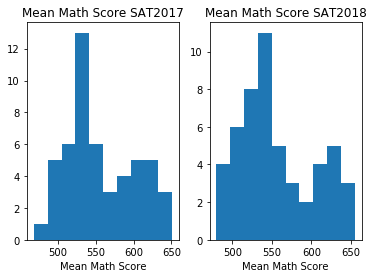

In [77]:
# Code #hist for sat math scores
subplot_histograms(final, math_list[:2], math_title[:2] , math_label[:2])

There seems to be an overall drop in the mean math scores for the SAT in 2017 to 2018. While the shape of the histograms are similar, we can see from the y-axis that overall the numbers across the mean scores have fallen except for the lowest quartile. 

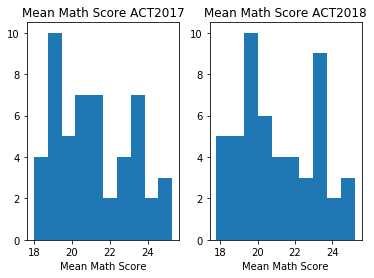

In [78]:
#hist for act math scores
subplot_histograms(final, math_list[2:], math_title[2:] , math_label[2:])

There is an increase in the number of scores in the third quartile and a decrease in the number of scores in the second quartile. This indicates more states doing better at math. 

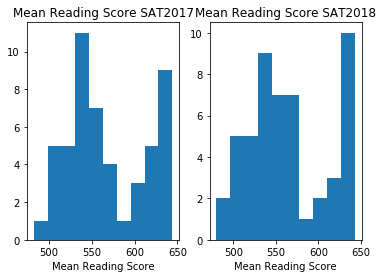

In [79]:
# Code #hist for sat reading scores
subplot_histograms(final, read_list[:2], read_title[:2] , read_label[:2])

There is an increase in the number of reading scores in the highest quartile and a decrease in the number of reading scores in the second quartile. The number of reading scores in the first quartile almost doubled from 2017 to 2018. This means that there are overall more states doing the SAT from 2017 to 2018.  

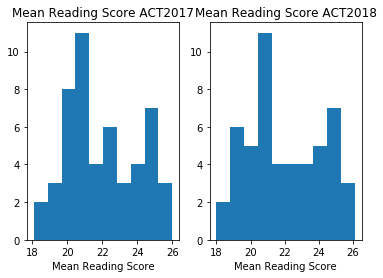

In [80]:
#hist for act reading scores
subplot_histograms(final, read_list[2:], read_title[2:] , read_label[2:])

We observe that there is little change in the shape of the histograms for ACT from 2017 to 2018. This might indicate the ratio of difficulty vs the students taking the exam is similar for 2017 and 2018.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [81]:
# Code
def subplot_scatterplot(x, y, x_label, y_label, title):
    plt.figure(figsize = (16, 9))
    sns.set_style('whitegrid')
    sns.scatterplot(x = final[x], y = final[y])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

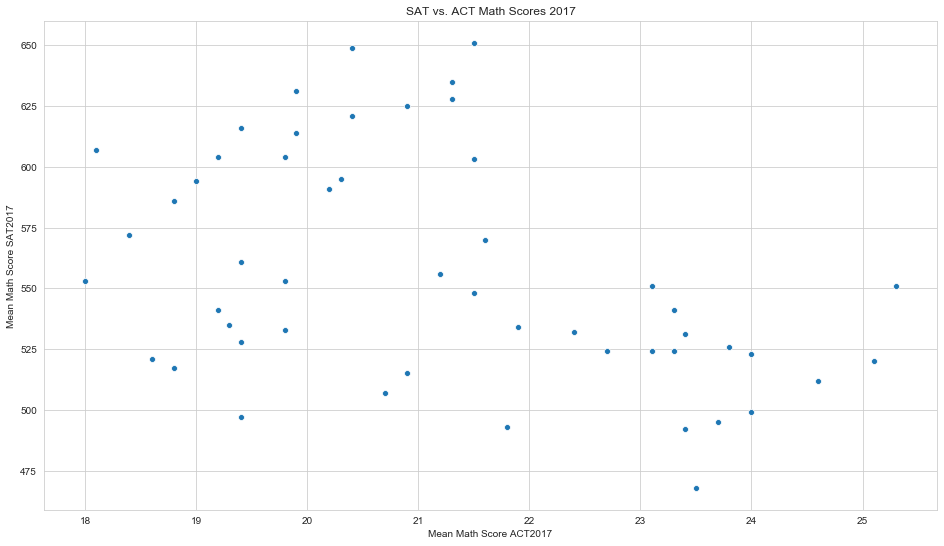

In [82]:
#scatterplot for SAT vs. ACT math scores for 2017
subplot_scatterplot('math_act_17', 'math_sat_17', 'Mean Math Score ACT2017', 'Mean Math Score SAT2017', 'SAT vs. ACT Math Scores 2017')

No obvious linear correlation, unlikely to be linearly related. (value from heatmap = -0.42)

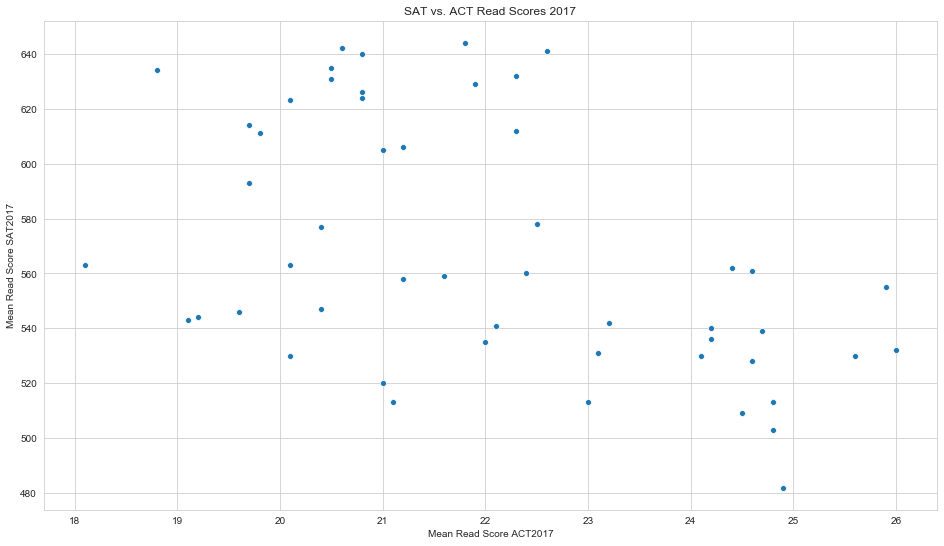

In [83]:
#scatterplot for SAT vs. ACT verbal/reading scores for 2017
subplot_scatterplot('read_act_17', 'erw_sat_17', 'Mean Read Score ACT2017', 'Mean Read Score SAT2017', 'SAT vs. ACT Read Scores 2017')

No obvious linear correlation, unlikely to be linearly related. (value from heatmap = -0.49)

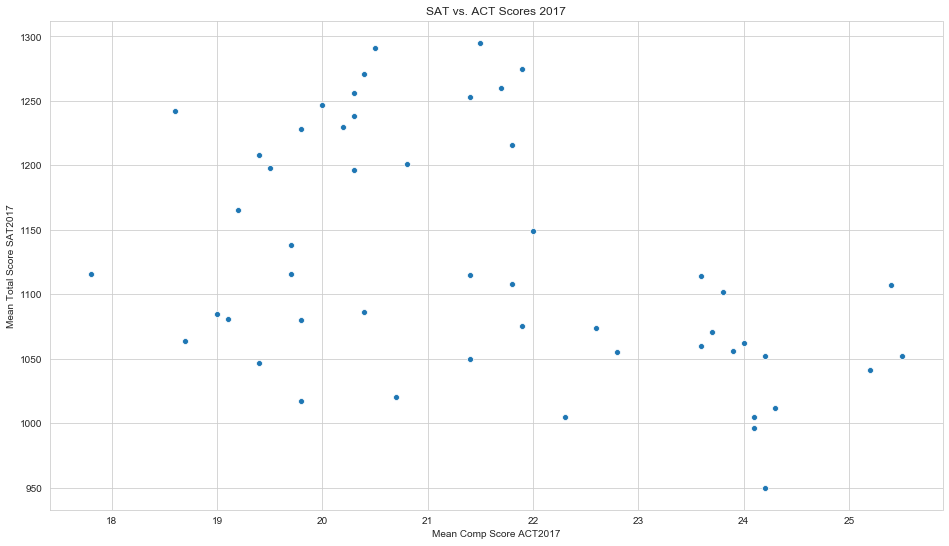

In [84]:
#scatterplot for SAT vs. ACT total/composite scores for 2017
subplot_scatterplot('comp_act_17', 'total_sat_17', 'Mean Comp Score ACT2017', 'Mean Total Score SAT2017', 'SAT vs. ACT Scores 2017')

No obvious linear correlation, unlikely to be linearly related. (value from heatmap = -0.45)

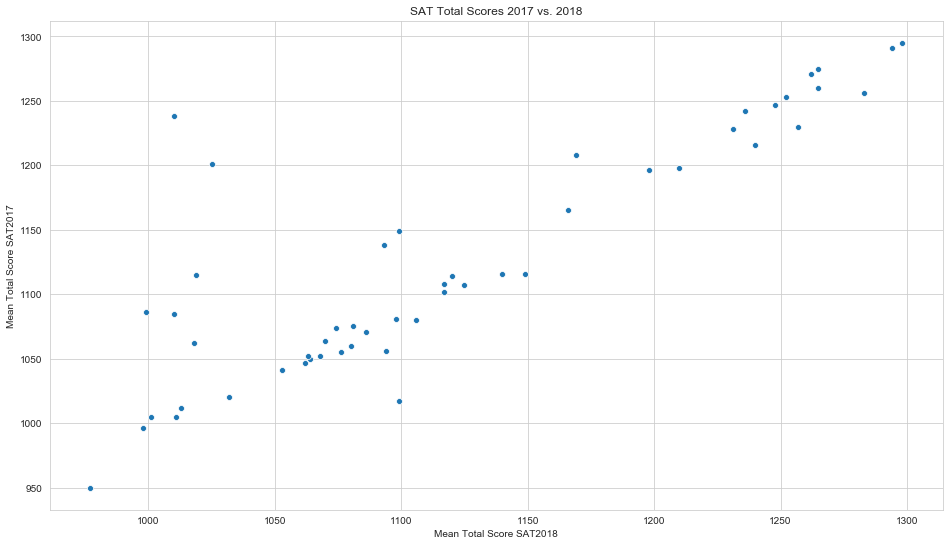

In [85]:
#scatterplot for Total scores for SAT 2017 vs. 2018
subplot_scatterplot('total_sat_18', 'total_sat_17', 'Mean Total Score SAT2018', 'Mean Total Score SAT2017', 'SAT Total Scores 2017 vs. 2018')

Postive linear correlation. (value from heatmap = 0.85) It is likely that the states with higher average scores will do better the following year as the schools who can better prepare the students in 2017 are likely to better prepare the next batch of students in 2018.

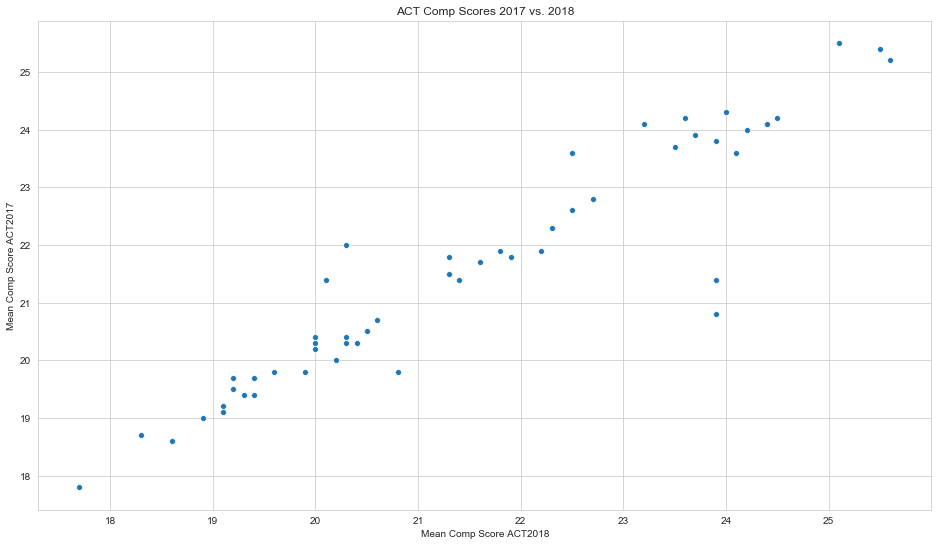

In [86]:
#scatterplot for Composite scores for ACT 2017 vs. 2018
subplot_scatterplot('comp_act_18', 'comp_act_17', 'Mean Comp Score ACT2018', 'Mean Comp Score ACT2017', 'ACT Comp Scores 2017 vs. 2018')

Postive linear correlation. (value from heatmap = 0.94) It is likely that the states with higher average scores will do better the following year as the schools who can better prepare the students in 2017 are likely to better prepare the next batch of students in 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [87]:
# Code
def subplot_boxplot(dataframe, col_names, x_label, title):
    plt.figure(figsize = (10, 4))
    sns.set_style('whitegrid')
    sns.boxplot(data = dataframe[col_names], orient = 'h')
    plt.xlabel(x_label)
    plt.title(title)

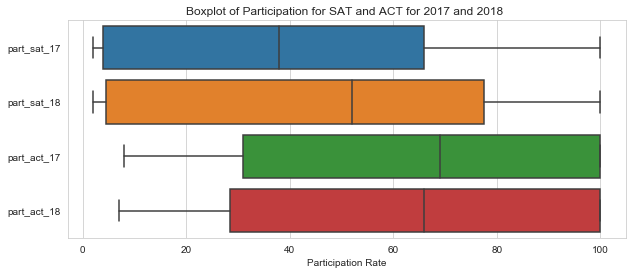

In [88]:
#boxplot for participation for both test and years
subplot_boxplot(final, ['part_sat_17', 'part_sat_18','part_act_17', 'part_act_18'], 'Participation Rate', 'Boxplot of Participation for SAT and ACT for 2017 and 2018 ')

We observe that the mean of the average participation rates are lower for SAT than ACT. However, we observe that there is an increase in the average participation rate for SAT from 2017 to 2018 while there is a slight decrease in the average participation rate for the ACT from 2017 to 2018.

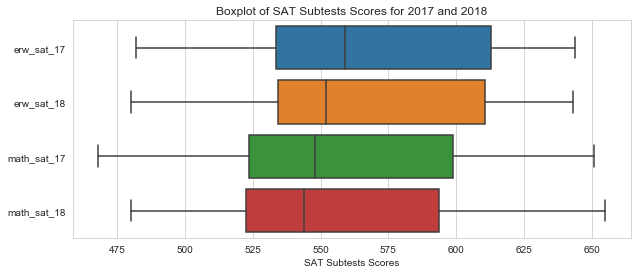

In [89]:
#boxplot for SAT subtests in 2017 and 2018
subplot_boxplot(final, ['erw_sat_17', 'erw_sat_18','math_sat_17', 'math_sat_18' ], 'SAT Subtests Scores', 'Boxplot of SAT Subtests Scores for 2017 and 2018')

The average evidence-based reading and writing scores have decreased from 2017 to 2018, however there are more scores lying above the mean of the averages. We observe a similar trend for the math scores from 2017 to 2018. We observe a decrease in both despite the increase in participation rate from each state. This is reflected in greater standard deviation for scores in 2018 compared to 2017.

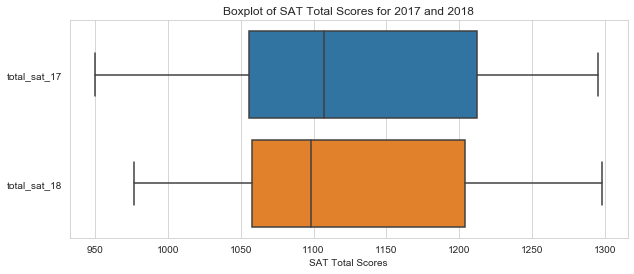

In [90]:
#boxplot for SAT total score in 2017 and 2018
subplot_boxplot(final, ['total_sat_17', 'total_sat_18'], 'SAT Total Scores', 'Boxplot of SAT Total Scores for 2017 and 2018')

Since the SAT total scores are directly proportional to the subtest scores, we see the same declining trend for the total scores from 2017 to 2018.

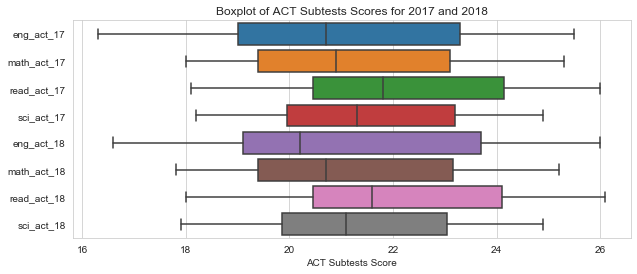

In [91]:
#boxplot for ACT subtests in 2017 and 2018
subplot_boxplot(final, ['eng_act_17','math_act_17','read_act_17', 'sci_act_17','eng_act_18','math_act_18','read_act_18', 'sci_act_18'], 'ACT Subtests Score', 'Boxplot of ACT Subtests Scores for 2017 and 2018')

There is a decrease in the average mean ACT scores across English, Math, Reading and Science form 2017 to 2018. We also observed the declining trend for participation in ACT from 2017 to 2018. This might imply that there is less participation from states who were having higher average scores. 

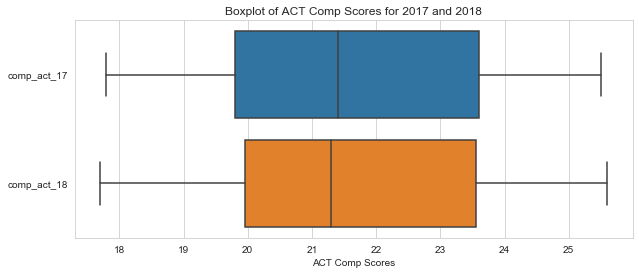

In [92]:
#boxplot for ACT comp score in 2017 and 2018
subplot_boxplot(final, ['comp_act_17', 'comp_act_18'], 'ACT Comp Scores', 'Boxplot of ACT Comp Scores for 2017 and 2018')

Since the ACT comp scores are directly proportional to the subtest scores, we see the same declining trend for the total scores from 2017 to 2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

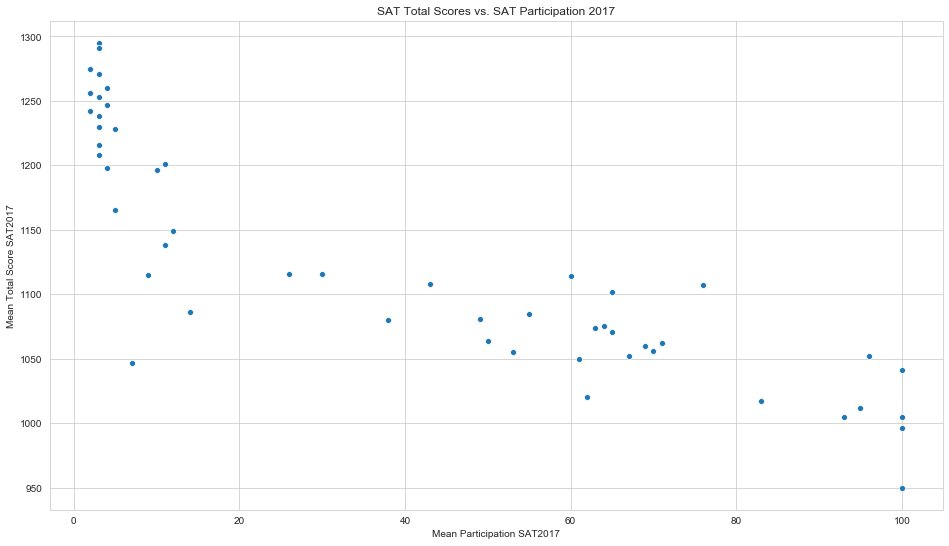

In [93]:
#scatterplot for  SAT total scores vs. SAT participation for 2017
subplot_scatterplot('part_sat_17', 'total_sat_17', 'Mean Participation SAT2017', 'Mean Total Score SAT2017',  'SAT Total Scores vs. SAT Participation 2017')

We observe a possible negative linear correlation that as partipation rate increases, average total score decreases. (heatmap value = -0.87)

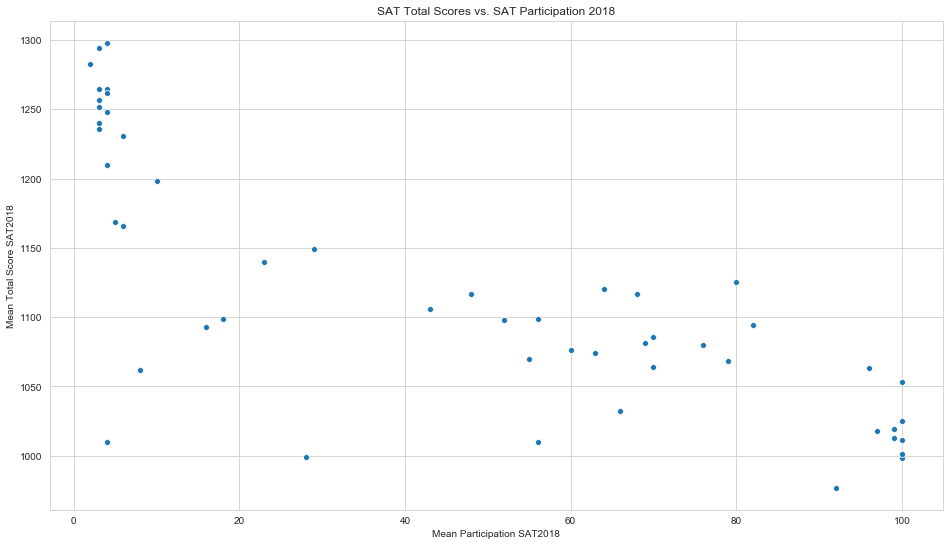

In [94]:
#scatterplot for  SAT total scores vs. SAT participation for 2018
subplot_scatterplot('part_sat_18', 'total_sat_18', 'Mean Participation SAT2018', 'Mean Total Score SAT2018',  'SAT Total Scores vs. SAT Participation 2018')

Similarly for 2018, ee observe a possible negative linear correlation that as partipation rate increases, average total score decreases. (heatmap value = -0.79) This is also reflected in the boxplots.

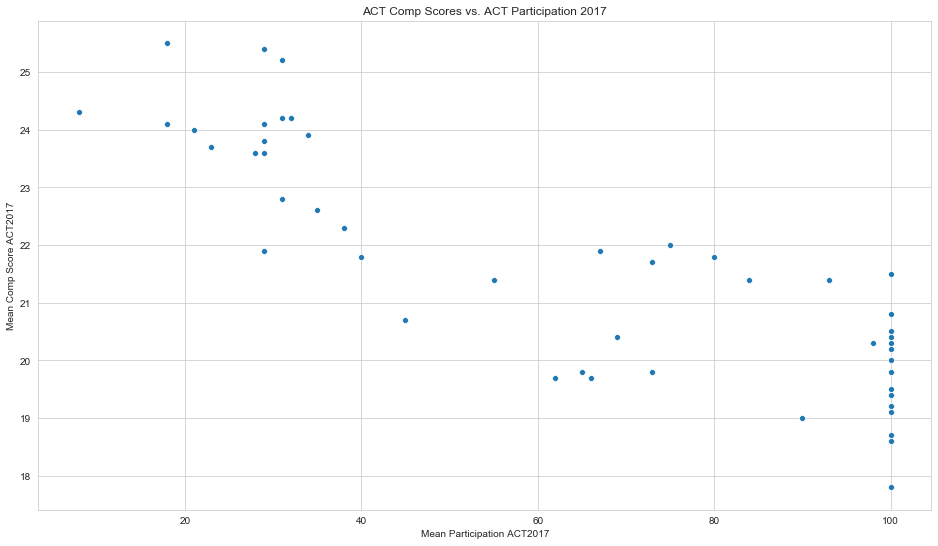

In [95]:
#scatterplot for ACT comp scores vs. ACT participation for 2017
subplot_scatterplot('part_act_17', 'comp_act_17', 'Mean Participation ACT2017', 'Mean Comp Score ACT2017',  'ACT Comp Scores vs. ACT Participation 2017')

We observe a possible negative linear correlation that as partipation rate increases, average total score decreases. (heatmap value = -.86)

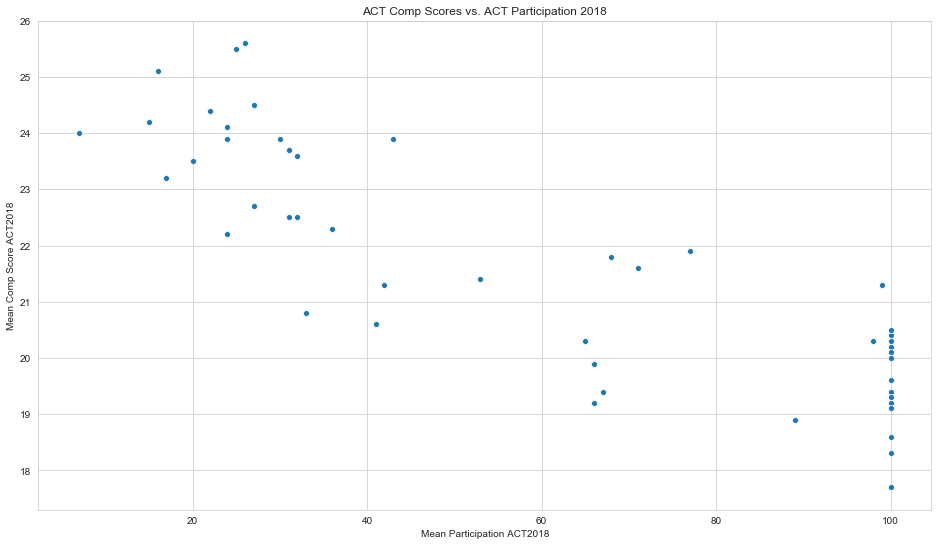

In [96]:
#scatterplot for ACT comp scores vs. ACT participation for 2018
subplot_scatterplot('part_act_18', 'comp_act_18', 'Mean Participation ACT2018', 'Mean Comp Score ACT2018',  'ACT Comp Scores vs. ACT Participation 2018')

We observe a possible negative linear correlation that as partipation rate increases, average total score decreases. (heatmap value =-0.86)

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:
Partipation Rate: 
While the number of participants are discrete, the participation rate is a continuous random variable regardless of SAT or ACT as it measures a ratio of the number of participants against the population of high school students. 

SAT Evidence-based Reading & Writing score: Regardless of year, this score has is discrete ranging from 200 to 800.
SAT Math: Regardless of year, this score has is discrete ranging from 200 to 800.
SAT Total: This is a sum of 2 discrete random variables, therefore it also follows a discrete distribution from 400 to 1600.

ACT English: Regardless of year, this score has is discrete ranging from 1 to 36. Thus, follows a discrete random distriution.
ACT Math: Regardless of year, this score has is discrete ranging from 1 to 36. Thus, follows a discrete random distriution.
ACT Reading: Regardless of year, this score has is discrete ranging from 1 to 36. Thus, follows a discrete random distriution.
ACT Science: Regardless of year, this score has is discrete ranging from 1 to 36. Thus, follows a discrete random distriution.
ACT Composite: This is calculate from the average of the 4 subtests you have to take. It follows a continuous random distribution. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No. A normal distribution has a property where the mean = median = mode. We can simply compare the mean and the 50th percentile (median) and realised that in none of the variables, the mean = mode. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: No, as neither of math, reading or rates have mean = value at 50th percentile. Depending on the population in each state, the participation rate may represent a very small group and may have inflated standard deviations due to the lack of data. Also, math and reading scores are discrete random variables, estmating them with a small sample size will result in huge estimation errors. We are also using different sample sizes of participants from each state and they all may follow their own distributions. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Not unless we get create obtain enough samples of each dataset to apply the Central Limit Theorem  to get a normal distribution of their means.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No. The scores obtained are likely to come from different candidates as only a few states have 100% participation on either test. This will not allow us to determine which test is a better representative of a single candidtate's mathematical ability. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

$$ H_0: \text{The true mean difference in perfomance between SAT and ACT is 0.} $$

$$ H_A: \text{The true mean difference in perfomance between SAT and ACT i NOT 0.} $$

In [132]:
#mean and std of performance of each test (average score/total score)
performance_sat_mean = (final[['total_sat_17', 'total_sat_18']].sum().sum())/(51 * 2)/1600
performance_sat_sd = np.std(list((final['total_sat_17']).map(lambda x : x/1600)) + list((final['total_sat_18']).map(lambda x : x/1600)))
performance_act_mean = (final[['comp_act_17', 'comp_act_18']].sum().sum())/(51 * 2)/36
performance_act_sd = np.std(list((final['comp_act_17']).map(lambda x : x/36)) + list((final['comp_act_18']).map(lambda x : x/36)))

In [134]:
# Code:
t_stat, p_value = stats.ttest_ind_from_stats(performance_sat_mean, performance_sat_sd, 102, performance_act_mean, performance_act_sd, 102)

In [135]:
t_stat, p_value

(13.042077170590655, 1.3200006279828572e-28)

Since p_value < 0.05, then there is evidence to reject the null hypothesis, so you accept that  𝐻0  is incorrect and therefore  𝐻𝐴  is correct. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Colorado, Nebraska and Ohio. Starting from April 11th, 2017 all Colorado high school juniors will take the SAT. This explains the drastic change from 11% to 100% participation rate for SAT from 2017 to 2018 and 100% to 30% pariticipation rate for SAT from 2017 to 2018. Nebraska also had a policy change to make ACT compulsory, which explain the increment from 84% to 100% for ACT from 2017 to 2018 despite no change in SAT participation rate. Likewise, for Ohio increment from 75% to 100% for ACT from 2017 to 2018.

https://www.testive.com/colorado-sat-change-2017/
https://www.education.ne.gov/assessment/act/
https://www.testive.com/state-sat-act/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

From our hypothesis testing, we have seen that there is a performance difference between the SAT and ACT. As ACT seems to be the one that most states make compulsory, there will be more participants (sample size) for colleges to set their requirements to best suit the candidates they onboard. Also, with a larger set of data, the examination board who sets the papers will be able to identify the scope of assessment to modify the syllabus to better represent the candidates' academic capabilities. 

Looking at Texas' participation rate, 66% participation for SAT and 41% participation for ACT, the state does not seem to have imposed any compulsory test. However, starting from 2020 low income students will be able to attain free tuition from the University of Texas. This would mean that low income students can consider entering college without being held back by their financial status. With more people considering college, they would have to participate in either of the tests. By making the one of the examples state funded, low income students considering college will be even more inclined to take either the ACT or SAT to enter University of Texas. 

https://admissions.utexas.edu/explore/freshman-profile
https://www.npr.org/2019/07/10/740387601/university-of-texas-austin-promises-free-tuition-for-low-income-students-in-2020

In [136]:
final.dtypes

state            object
part_sat_17     float64
erw_sat_17        int64
math_sat_17       int64
total_sat_17      int64
part_act_17     float64
eng_act_17      float64
math_act_17     float64
read_act_17     float64
sci_act_17      float64
comp_act_17     float64
part_sat_18     float64
erw_sat_18        int64
math_sat_18       int64
total_sat_18      int64
part_act_18       int64
eng_act_18      float64
math_act_18     float64
read_act_18     float64
sci_act_18      float64
comp_act_18     float64
dtype: object